In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
vin = pandas.read_csv('./data/VIN_0_2V_VDD1.csv')
vin

,/VIN (VIN=0.001) X,/VIN (VIN=0.001) Y,/VIN (VIN=0.002) X,/VIN (VIN=0.002) Y,/VIN (VIN=0.003) X,/VIN (VIN=0.003) Y,/VIN (VIN=0.004) X,/VIN (VIN=0.004) Y,/VIN (VIN=0.005) X,/VIN (VIN=0.005) Y,...,/VIN (VIN=1.997) X,/VIN (VIN=1.997) Y,/VIN (VIN=1.998) X,/VIN (VIN=1.998) Y,/VIN (VIN=1.999) X,/VIN (VIN=1.999) Y,/VIN (VIN=2) X,/VIN (VIN=2) Y,/VIN (VIN=0) X,/VIN (VIN=0) Y
0,0.000,0.001,0.000,0.002,0.000,0.003,0.000,0.004,0.000,0.005,...,0.000,1.997,0.000,1.998,0.000,1.999,0.000,2,0.000,0
1,0.001,0.001,0.001,0.002,0.001,0.003,0.001,0.004,0.001,0.005,...,0.001,1.997,0.001,1.998,0.001,1.999,0.001,2,0.001,0
2,0.002,0.001,0.002,0.002,0.002,0.003,0.002,0.004,0.002,0.005,...,0.002,1.997,0.002,1.998,0.002,1.999,0.002,2,0.002,0
3,0.003,0.001,0.003,0.002,0.003,0.003,0.003,0.004,0.003,0.005,...,0.003,1.997,0.003,1.998,0.003,1.999,0.003,2,0.003,0
4,0.004,0.001,0.004,0.002,0.004,0.003,0.004,0.004,0.004,0.005,...,0.004,1.997,0.004,1.998,0.004,1.999,0.004,2,0.004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19.996,0.001,19.996,0.002,19.996,0.003,19.996,0.004,19.996,0.005,...,19.996,1.997,19.996,1.998,19.996,1.999,19.996,2,19.996,0
19997,19.997,0.001,19.997,0.002,19.997,0.003,19.997,0.004,19.997,0.005,...,19.997,1.997,19.997,1.998,19.997,1.999,19.997,2,19.997,0
19998,19.998,0.001,19.998,0.002,19.998,0.003,19.998,0.004,19.998,0.005,...,19.998,1.997,19.998,1.998,19.998,1.999,19.998,2,19.998,0
19999,19.999,0.001,19.999,0.002,19.999,0.003,19.999,0.004,19.999,0.005,...,19.999,1.997,19.999,1.998,19.999,1.999,19.999,2,19.999,0


In [3]:
spk = pandas.read_csv('./data/Vcmp_output_spike_0_2V_VDD1.csv')
spk

,/Vcmp (VIN=0) X,/Vcmp (VIN=0) Y,/Vcmp (VIN=0.001) X,/Vcmp (VIN=0.001) Y,/Vcmp (VIN=0.002) X,/Vcmp (VIN=0.002) Y,/Vcmp (VIN=0.003) X,/Vcmp (VIN=0.003) Y,/Vcmp (VIN=0.004) X,/Vcmp (VIN=0.004) Y,...,/Vcmp (VIN=1.996) X,/Vcmp (VIN=1.996) Y,/Vcmp (VIN=1.997) X,/Vcmp (VIN=1.997) Y,/Vcmp (VIN=1.998) X,/Vcmp (VIN=1.998) Y,/Vcmp (VIN=1.999) X,/Vcmp (VIN=1.999) Y,/Vcmp (VIN=2) X,/Vcmp (VIN=2) Y
0,0.000,0.104296,0.000,0.104296,0.000,0.104296,0.000,0.104296,0.000,0.104296,...,0.000,0.104296,0.000,0.104296,0.000,0.104296,0.000,0.104296,0.000,0.104296
1,0.001,0.104296,0.001,0.104296,0.001,0.104296,0.001,0.104296,0.001,0.104296,...,0.001,0.104321,0.001,0.104321,0.001,0.104321,0.001,0.104321,0.001,0.104321
2,0.002,0.104296,0.002,0.104296,0.002,0.104296,0.002,0.104296,0.002,0.104296,...,0.002,0.104356,0.002,0.104356,0.002,0.104356,0.002,0.104356,0.002,0.104356
3,0.003,0.104296,0.003,0.104296,0.003,0.104296,0.003,0.104296,0.003,0.104296,...,0.003,0.104401,0.003,0.104401,0.003,0.104401,0.003,0.104401,0.003,0.104401
4,0.004,0.104296,0.004,0.104296,0.004,0.104296,0.004,0.104296,0.004,0.104296,...,0.004,0.104465,0.004,0.104465,0.004,0.104465,0.004,0.104465,0.004,0.104465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19.996,0.104354,19.996,0.104355,19.996,0.104355,19.996,0.104356,19.996,0.104356,...,19.996,0.517467,19.996,0.515020,19.996,0.516341,19.996,0.515275,19.996,0.518276
19997,19.997,0.104354,19.997,0.104355,19.997,0.104355,19.997,0.104356,19.997,0.104356,...,19.997,0.519408,19.997,0.517007,19.997,0.518327,19.997,0.517234,19.997,0.520230
19998,19.998,0.104354,19.998,0.104355,19.998,0.104355,19.998,0.104356,19.998,0.104356,...,19.998,0.521348,19.998,0.518993,19.998,0.520314,19.998,0.519193,19.998,0.522184
19999,19.999,0.104354,19.999,0.104355,19.999,0.104355,19.999,0.104356,19.999,0.104356,...,19.999,0.523289,19.999,0.520980,19.999,0.522300,19.999,0.521152,19.999,0.524138


In [4]:
t   = torch.tensor(vin.iloc[:,0].to_numpy()).repeat(2000,1).T
VIN = torch.tensor(vin.iloc[:,1:-1:2].to_numpy())
VOUT = torch.tensor(spk.iloc[:,1:-1:2].to_numpy())

data = torch.stack([t, VIN, VOUT])
data = data[:,:3000:10,:]
data.shape

torch.Size([3, 300, 2000])

Text(0, 0.5, 'V_out')

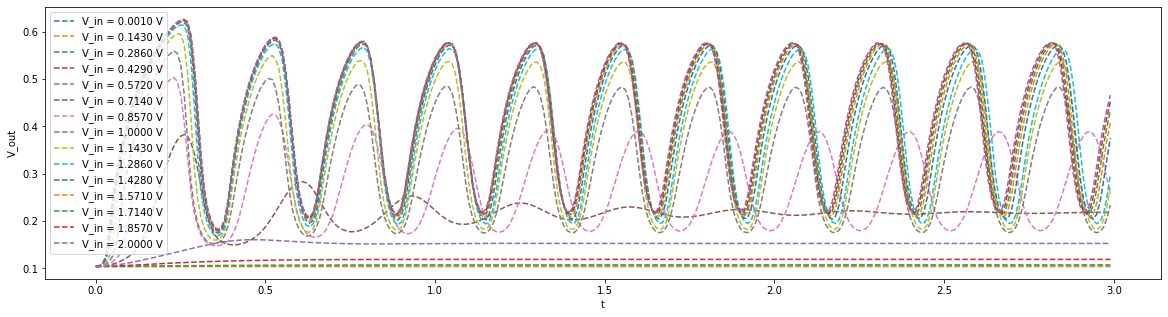

In [7]:
plt.figure(figsize=[20,5])
for k in np.linspace(0,data.shape[2]-1,15).astype(int):
    i = k
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.xlabel('t')
plt.ylabel('V_out')

In [8]:
np.savetxt('./data/vin_const.csv', data[1,:,:], fmt='%.8f', delimiter=',')
np.savetxt('./data/vout_const.csv', data[2,:,:], fmt='%.8f', delimiter=',')